In [4]:
import pandas as pd
import matplotlib.pyplot as mltp
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import sklearn as sk
import seaborn as sea
import re 
from tqdm import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()



Latent Dirichlet Allocation (LDA) is a popular algorithm for topic modeling, which is a technique for identifying the underlying themes or topics in a collection of text documents. LDA is a generative probabilistic model that assumes each document is a mixture of a fixed number of topics, and each word in the document is drawn from one of the topics.

The goal of LDA is to infer the topics that generated the words in each document, and to estimate the distribution of words across the topics. This allows LDA to automatically discover the topics present in a collection of documents and to represent each document as a mixture of these topics.

LDA can be used in a variety of applications, such as automatically organizing large collections of documents by topic, identifying the main themes in a corpus of text, or recommending articles similar to a given article. LDA is also often used as a preprocessing step for downstream natural language processing tasks such as text classification or information extraction.

To use LDA, you need to specify the number of topics in the model and fit the model to the documents. The LDA model will then learn the distribution of words across the topics and the distribution of topics for each document. You can then use the model to predict the topics for new documents, or to explore the learned topics and the words associated with each topic.

atent Dirichlet Allocation (LDA) is a generative probabilistic model that assumes each document is a mixture of a fixed number of topics, and each word in the document is drawn from one of the topics. The goal of LDA is to infer the topics that generated the words in each document, and to estimate the distribution of words across the topics.

To do this, LDA uses Bayesian inference, which is a method for estimating the unknown parameters of a probabilistic model based on observed data. In the case of LDA, the model parameters are the topic distributions for each document and the word distributions for each topic.

Here is a high-level overview of how LDA functions:

1. First, LDA assumes that each document is a mixture of a fixed number of topics, and that each word in the document is generated by one of the topics. This means that for each document, there is a probability distribution over the topics, and for each topic, there is a probability distribution over the words.

2. Given a collection of documents, LDA uses Bayesian inference to infer the topic distributions for each document and the word distributions for each topic. This is done by iteratively sampling the topic assignments for each word in each document, and then estimating the topic distributions and word distributions based on the sampled topic assignments.

3. Once the topic distributions and word distributions have been inferred, LDA can be used to predict the topics for new documents. This is done by computing the posterior distribution over the topics given the words in the new document, and then selecting the most likely topics.

4. LDA can also be used to explore the learned topics and the words associated with each topic. This is done by examining the inferred topic distributions and word distributions and identifying the words with the highest probabilities for each topic.

Overall, LDA is a powerful tool for automatically discovering the underlying themes or topics in a collection of text documents. It can be used in a variety of applications, and is often used as a preprocessing step for downstream natural language processing tasks.

Latent Dirichlet Allocation (LDA) ist ein generatives probabilistisches Modell, das davon ausgeht, dass jedes Dokument eine Mischung aus einer festen Anzahl von Themen ist und jedes Wort im Dokument aus einem der Themen stammt. Das Ziel von LDA ist es, die Themen zu ermitteln, die die Wörter in jedem Dokument erzeugt haben, und die Verteilung der Wörter über die Themen zu schätzen.

Um dies zu tun, verwendet LDA Bayes-Schätzung, die eine Methode zur Schätzung der unbekannten Parameter eines probabilistischen Modells anhand beobachteter Daten ist. Im Falle von LDA sind die Modellparameter die Themenverteilungen für jedes Dokument und die Wortverteilungen für jedes Thema.

Hier ist ein Überblick über die Funktionsweise von LDA:

Zunächst geht LDA davon aus, dass jedes Dokument eine Mischung aus einer festen Anzahl von Themen ist und dass jedes Wort im Dokument von einem der Themen erzeugt wird. Das bedeutet, dass es für jedes Dokument eine Wahrscheinlichkeitsverteilung über die Themen gibt und für jedes Thema eine Wahrscheinlichkeitsverteilung über die Wörter.

Angenommen, es gibt eine Sammlung von Dokumenten, verwendet LDA Bayes-Schätzung, um die Themenverteilungen für jedes Dokument und die Wortverteilungen für jedes Thema zu schätzen. Dies wird dadurch erreicht, dass die Themenzuordnungen für jedes Wort in jedem Dokument iterativ gesampelt werden und anschließend die Themenverteilungen und Wortverteilungen anhand der gesampelten Themenzuordnungen geschätzt werden.

Sobald die Themenverteilungen und Wortverteilungen geschätzt wurden, kann LDA verwendet werden, um die Themen für neue Dokumente vorherzusagen. Dies geschieht, indem die posterior Verteilung über die Themen gegebenen die Wörter im neuen Dokument berechnet wird und anschließend die wahrscheinlichsten Themen ausgewählt werden.

LDA kann auch verwendet werden, um die gelernten Themen und die mit jedem Thema verbundenen Wörter zu erkunden. Dies geschieht, indem die geschätzten Themenverte

In [7]:
df=pd.read_csv('data/train_500.csv',converters={'sent_tokenize': lambda x: x[1:-1].strip('][').replace("'","").strip().split(','),
'word_tokenize': lambda x: x[1:-1].strip('][').replace("'","").strip().split(','),
'word_tokenize_without_stopwords': lambda x: x[1:-1].strip('][').replace("'","").strip().split(',')
,'word_tokenize_without_stopwords_port': lambda x: x[1:-1].strip('][').replace("'","").strip().split(',')
,'msg_lemmatized': lambda x: x[1:-1].strip('][').replace("'","").strip().split(',')
})

df['word_tokenize']=df['word_tokenize'].progress_apply(stripping)
df['sent_tokenize']=df['sent_tokenize'].progress_apply(stripping)
df['word_tokenize_without_stopwords']=df['word_tokenize_without_stopwords'].progress_apply(stripping)
df['word_tokenize_without_stopwords_port']=df['word_tokenize_without_stopwords_port'].progress_apply(stripping)
df['word_tokenize_without_stopwords_port']=df['word_tokenize_without_stopwords_port'].progress_apply(stripping)

  0%|          | 0/19500 [00:00<?, ?it/s]

  0%|          | 0/19500 [00:00<?, ?it/s]

  0%|          | 0/19500 [00:00<?, ?it/s]

  0%|          | 0/19500 [00:00<?, ?it/s]

  0%|          | 0/19500 [00:00<?, ?it/s]

In [6]:
def stripping(liste):
    return [i.strip() for i in liste]

In [8]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df=df.reset_index(drop=True)

In [9]:
df.columns

Index(['id', 'date', 'text', 'lang', 'language_2', 'word_tokenize',
       'sent_tokenize', 'count_word', 'count_sent',
       'word_tokenize_num_of_stopwords', 'word_tokenize_without_stopwords',
       'word_tokenize_without_stopwords_port', 'msg_lemmatized', 'cleanLinks',
       'word_per_sent_mean', 'gender', 'age', 'topic', 'sign'],
      dtype='object')

In [10]:
print(f'Rows in the df: {len(df.index)}')

Rows in the df: 19500


In [11]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word)
        
         for word in text if word ]
    return lemm_text
df['msg_lemmatized_port']=df['word_tokenize_without_stopwords_port'].apply(lambda x:lemmatizer(x))

- lgrams 
- ngrams 
- sehen wie oft wörter vorkommen 
- sehen welche tokens überall vorkommen in mehreren oder nur in einem drin sind 
- sehen welche dokumente zugeordnet ist und wie  die verteilung ist der uhrsprünglichen topics 
- tendenzen herrausfinden 
- labeling nicht so gut oder topic modelling 
- zu viel topics oder stopwords 
- frequenzen finden -_> idf --> weiviele wörter in den dokumenten vorkommen 
- statistiken der wörter --> basierend auf ngrams 
- edge case nicht beschneiden --> schwellwerte --> explorativ 
- 

In [12]:
df.head()

,id,date,text,lang,language_2,word_tokenize,sent_tokenize,count_word,count_sent,word_tokenize_num_of_stopwords,word_tokenize_without_stopwords,word_tokenize_without_stopwords_port,msg_lemmatized,cleanLinks,word_per_sent_mean,gender,age,topic,sign,msg_lemmatized_port
0,2970791,"25,May,2004",This blog is being posted due to the fact that...,en,en,"[This, blog, is, being, posted, due, to, the, ...",[This blog is being posted due to the fact tha...,83,4,34,"[This, blog, posted, due, fact, little, develo...","[thi, blog, post, due, fact, littl, develop, h...","[thi, blog, post, due, fact, littl, deve...",This blog is being posted due to the fact that...,20.75,male,14,Student,Sagittarius,"[thi, blog, post, due, fact, littl, develop, h..."
1,3931851,"02,agosto,2004",So I have a big fucking interview tomorrow for...,en,en,"[So, I, have, a, big, fucking, interview, tomo...",[So I have a big fucking interview tomorrow fo...,88,5,31,"[So, I, big, fucking, interview, tomorrow, new...","[so, i, big, fuck, interview, tomorrow, new, s...","[so, i, big, fuck, interview, tomorrow, ...",So I have a big fucking interview tomorrow for...,17.60,male,15,Student,Pisces,"[so, i, big, fuck, interview, tomorrow, new, s..."
2,3481650,"07,July,2004",I was reminded just now of the time Ashley and...,en,en,"[I, was, reminded, just, now, of, the, time, A...",[I was reminded just now of the time Ashley an...,574,32,234,"[I, reminded, time, Ashley, I, drove, Kemah, w...","[i, remind, time, ashley, i, drove, kemah, win...","[i, remind, time, ashley, i, drove, kema...",I was reminded just now of the time Ashley and...,17.94,female,17,Student,Gemini,"[i, remind, time, ashley, i, drove, kemah, win..."
3,4187211,"20,August,2004",I was checking up on my cousin Dylan and Fanni...,en,en,"[I, was, checking, up, on, my, cousin, Dylan, ...","[""I was checking up on my cousin Dylan and Fan...",84,3,32,"[I, checking, cousin, Dylan, Fannie, ""s"", wedd...","[i, check, cousin, dylan, fanni, ""s"", wed, sit...","[i, check, cousin, dylan, fanni, ""s"", we...",I was checking up on my cousin Dylan and Fanni...,28.00,female,23,Student,Taurus,"[i, check, cousin, dylan, fanni, ""s"", wed, sit..."
4,3686696,"24,June,2004",for the NME interview click urlLink part 1 and...,en,en,"[for, the, NME, interview, click, urlLink, par...",[for the NME interview click urlLink part 1 an...,12,1,3,"[NME, interview, click, urlLink, part, 1, urlL...","[nme, interview, click, urllink, part, 1, urll...","[nme, interview, click, urllink, part, 1,...",for the NME interview click urlLink part 1 and...,12.00,female,23,Student,Aquarius,"[nme, interview, click, urllink, part, 1, urll..."


In [13]:
from wordcloud import WordCloud

In [14]:
element=[',','.','!','"',')','(']

x = [word  for word in  df['msg_lemmatized_port'][0] if word not in element]
x

['thi',
 'blog',
 'post',
 'due',
 'fact',
 'littl',
 'develop',
 'happen',
 'recent',
 'regard',
 'last',
 'day',
 'school',
 'uniform',
 'swap',
 'if',
 'plan',
 'switch',
 'uniform',
 'certain',
 'individu',
 'must',
 'somehow',
 'organ',
 'someth',
 'soon',
 'also',
 'consid',
 'last',
 'day',
 'school',
 'i',
 'think',
 'everyon',
 'particip',
 'success',
 'we',
 'must',
 'plan',
 'soon',
 'pray',
 'drop-the-dress-code-day',
 'last',
 'day',
 'school']

In [15]:
def point_red(liste):
    element=[',','.','!','"',')','(']
    return [word  for word in  df['msg_lemmatized'][0] if word not in element]
df['msg_lemmatized_without_point']=df['msg_lemmatized_port'].apply(lambda x:point_red(x))


In [16]:
text = list(df.msg_lemmatized_without_point.values)
flat_list = [item for sublist in text for item in sublist]
flat_list

['thi',
 ' blog',
 ' post',
 ' due',
 ' fact',
 ' littl',
 ' develop',
 ' happen',
 ' recent',
 ' regard',
 ' last',
 ' day',
 ' school',
 ' uniform',
 ' swap',
 ' .',
 ' if',
 ' plan',
 ' switch',
 ' uniform',
 ' certain',
 ' individu',
 ' must',
 ' somehow',
 ' organ',
 ' someth',
 ' soon',
 ' .',
 ' also',
 ' consid',
 ' last',
 ' day',
 ' school',
 ' i',
 ' think',
 ' everyon',
 ' particip',
 ' success',
 ' .',
 ' we',
 ' must',
 ' plan',
 ' soon',
 ' pray',
 ' drop-the-dress-code-day',
 ' last',
 ' day',
 ' school',
 ' .',
 'thi',
 ' blog',
 ' post',
 ' due',
 ' fact',
 ' littl',
 ' develop',
 ' happen',
 ' recent',
 ' regard',
 ' last',
 ' day',
 ' school',
 ' uniform',
 ' swap',
 ' .',
 ' if',
 ' plan',
 ' switch',
 ' uniform',
 ' certain',
 ' individu',
 ' must',
 ' somehow',
 ' organ',
 ' someth',
 ' soon',
 ' .',
 ' also',
 ' consid',
 ' last',
 ' day',
 ' school',
 ' i',
 ' think',
 ' everyon',
 ' particip',
 ' success',
 ' .',
 ' we',
 ' must',
 ' plan',
 ' soon',
 ' pray',

In [17]:
long_string = ','.join(flat_list)

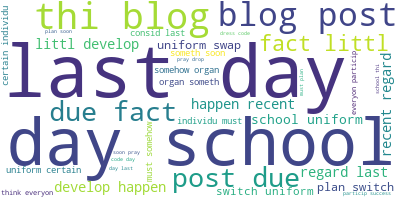

In [18]:
text = list(df.msg_lemmatized.values)
wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [19]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [20]:
from nltk import ngrams
def get_ngrams(text, n):
    n_grams = ngrams(word_tokenize(text), n)
    return [' '.join(grams) for grams in n_grams]
sent_2=df['text'][0]
get_ngrams(sent_2,6)

['This blog is being posted due',
 'blog is being posted due to',
 'is being posted due to the',
 'being posted due to the fact',
 'posted due to the fact that',
 'due to the fact that little',
 'to the fact that little development',
 'the fact that little development has',
 'fact that little development has happened',
 'that little development has happened recently',
 'little development has happened recently regarding',
 'development has happened recently regarding the',
 'has happened recently regarding the last',
 'happened recently regarding the last day',
 'recently regarding the last day of',
 'regarding the last day of school',
 'the last day of school uniform',
 'last day of school uniform swap',
 'day of school uniform swap .',
 'of school uniform swap . If',
 'school uniform swap . If we',
 'uniform swap . If we all',
 'swap . If we all plan',
 '. If we all plan to',
 'If we all plan to switch',
 'we all plan to switch uniforms',
 'all plan to switch uniforms with',
 'plan t

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections


import nltk
from nltk.corpus import stopwords
import re


import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [22]:
all_words_nsw = list(itertools.chain(*df['msg_lemmatized_without_point']))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[(' .', 78000),
 (' last', 58500),
 (' day', 58500),
 (' school', 58500),
 (' uniform', 39000),
 (' plan', 39000),
 (' must', 39000),
 (' soon', 39000),
 ('thi', 19500),
 (' blog', 19500),
 (' post', 19500),
 (' due', 19500),
 (' fact', 19500),
 (' littl', 19500),
 (' develop', 19500)]

In [23]:
len(counts_nsw)

36

In [24]:
clean_tweets_no_urls = pd.DataFrame(counts_nsw,
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count


In [25]:
from ast import literal_eval
def create_word_dict(data, without_stopwords=True, with_stopwords=False):

    if without_stopwords:
        word_dict_without_stopwords = {}
        
    if with_stopwords:
        word_dict_with_stopwords = {}

    stopword_list = stopwords.words('english')
    for i in tqdm(range(len(data))):
        if without_stopwords:
            for word in literal_eval(str(data["word_tokenize_without_stopwords"][i])):
                if word not in [",", ".", ")", "(", "{", "}", "[", "]", ":", ";", "\"\"", "...", "I"] and word not in stopword_list:
                    if word in word_dict_without_stopwords.keys():
                        word_dict_without_stopwords[word] += 1
                    else:
                        word_dict_without_stopwords[word] = 1

        if with_stopwords:
            for word in literal_eval(str(data["word_tokenize"][i])):
                if word not in [",", ".", ")", "(", "{", "}", "[", "]", ":", ";", "\"\"", "...", "I"]:
                    if word in word_dict_with_stopwords.keys():
                        word_dict_with_stopwords[word] += 1
                    else:
                        word_dict_with_stopwords[word] = 1

    if without_stopwords and with_stopwords:
        return word_dict_without_stopwords, word_dict_with_stopwords
    elif without_stopwords:
        return word_dict_without_stopwords
    elif with_stopwords:
        return word_dict_with_stopwords
    else:
        print("Nothing to return selected")
        return 0

In [26]:
words_without_stopwords, words_with_stopwords = create_word_dict(df, True, True)

  0%|          | 0/19500 [00:00<?, ?it/s]

UnboundLocalError: local variable 'fig' referenced before assignment

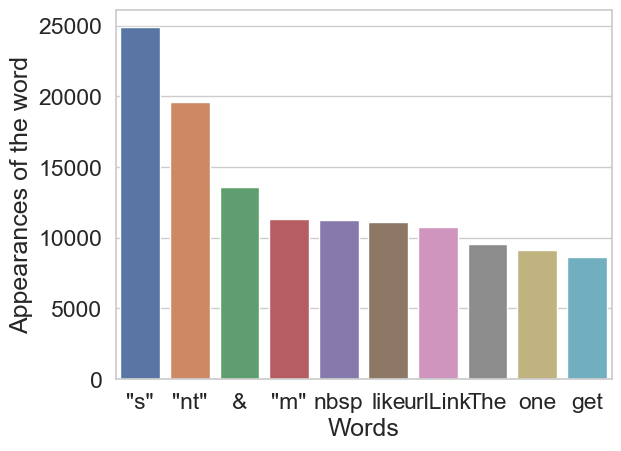

In [27]:
import seaborn as sb
def visualize_specific_words(dictionary, limit=10, save_fig=True, save_name="standard_save_name"):
    data_as_df = pd.DataFrame(data={"word": dictionary.keys(), "number": dictionary.values()})
    sorted_df = data_as_df.sort_values(by="number", ascending=False)

    figure = sb.barplot(data=sorted_df[:limit], x="word", y="number", palette="deep")
    figure.set_xlabel("Words")
    figure.set_ylabel("Appearances of the word")

    if save_fig:
        fig = figure.get_figure()
        fig.savefig(str(save_name + ".jpg"))

    return fig.get_figure()
figure_1 = visualize_specific_words(words_without_stopwords, save_fig=False)

In [28]:
df.msg_lemmatized_without_point.values.tolist()

[['thi',
  ' blog',
  ' post',
  ' due',
  ' fact',
  ' littl',
  ' develop',
  ' happen',
  ' recent',
  ' regard',
  ' last',
  ' day',
  ' school',
  ' uniform',
  ' swap',
  ' .',
  ' if',
  ' plan',
  ' switch',
  ' uniform',
  ' certain',
  ' individu',
  ' must',
  ' somehow',
  ' organ',
  ' someth',
  ' soon',
  ' .',
  ' also',
  ' consid',
  ' last',
  ' day',
  ' school',
  ' i',
  ' think',
  ' everyon',
  ' particip',
  ' success',
  ' .',
  ' we',
  ' must',
  ' plan',
  ' soon',
  ' pray',
  ' drop-the-dress-code-day',
  ' last',
  ' day',
  ' school',
  ' .'],
 ['thi',
  ' blog',
  ' post',
  ' due',
  ' fact',
  ' littl',
  ' develop',
  ' happen',
  ' recent',
  ' regard',
  ' last',
  ' day',
  ' school',
  ' uniform',
  ' swap',
  ' .',
  ' if',
  ' plan',
  ' switch',
  ' uniform',
  ' certain',
  ' individu',
  ' must',
  ' somehow',
  ' organ',
  ' someth',
  ' soon',
  ' .',
  ' also',
  ' consid',
  ' last',
  ' day',
  ' school',
  ' i',
  ' think',
  ' every

In [29]:
liste=[]
for topic in  topics:

    text = list(df[df['topic']==topic].msg_lemmatized_without_point.values)
    flat_list = [item for sublist in text for item in sublist]
    liste.append(flat_list)
liste

NameError: name 'topics' is not defined

In [30]:
import gensim.corpora as corpora

In [31]:
df['msg_lemmatized_without_point'].values.tolist()

[['thi',
  ' blog',
  ' post',
  ' due',
  ' fact',
  ' littl',
  ' develop',
  ' happen',
  ' recent',
  ' regard',
  ' last',
  ' day',
  ' school',
  ' uniform',
  ' swap',
  ' .',
  ' if',
  ' plan',
  ' switch',
  ' uniform',
  ' certain',
  ' individu',
  ' must',
  ' somehow',
  ' organ',
  ' someth',
  ' soon',
  ' .',
  ' also',
  ' consid',
  ' last',
  ' day',
  ' school',
  ' i',
  ' think',
  ' everyon',
  ' particip',
  ' success',
  ' .',
  ' we',
  ' must',
  ' plan',
  ' soon',
  ' pray',
  ' drop-the-dress-code-day',
  ' last',
  ' day',
  ' school',
  ' .'],
 ['thi',
  ' blog',
  ' post',
  ' due',
  ' fact',
  ' littl',
  ' develop',
  ' happen',
  ' recent',
  ' regard',
  ' last',
  ' day',
  ' school',
  ' uniform',
  ' swap',
  ' .',
  ' if',
  ' plan',
  ' switch',
  ' uniform',
  ' certain',
  ' individu',
  ' must',
  ' somehow',
  ' organ',
  ' someth',
  ' soon',
  ' .',
  ' also',
  ' consid',
  ' last',
  ' day',
  ' school',
  ' i',
  ' think',
  ' every

In [32]:
data_words=df.msg_lemmatized_without_point.values.tolist()

In [33]:
data_words=df.msg_lemmatized_without_point.values.tolist()
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 4), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 3), (16, 1), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 3), (26, 1), (27, 1), (28, 2), (29, 1)]


In [34]:
import gensim
from gensim.utils import simple_preprocess

In [35]:
from pprint import pprint
# number of topics
num_topics = 20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is requir

[(0,
  '0.077*" ." + 0.056*" day" + 0.055*" school" + 0.048*" plan" + 0.046*" '
  'uniform" + 0.045*" soon" + 0.044*" must" + 0.041*" last" + 0.026*" fact" + '
  '0.025*" if"'),
 (1,
  '0.072*" ." + 0.067*" day" + 0.063*" school" + 0.057*" last" + 0.045*" must" '
  '+ 0.043*" uniform" + 0.041*" soon" + 0.040*" plan" + 0.024*" due" + 0.023*" '
  'someth"'),
 (2,
  '0.074*" ." + 0.067*" day" + 0.059*" last" + 0.051*" school" + 0.047*" soon" '
  '+ 0.043*" uniform" + 0.040*" must" + 0.037*" plan" + 0.025*" switch" + '
  '0.024*" pray"'),
 (3,
  '0.079*" ." + 0.064*" day" + 0.063*" school" + 0.057*" last" + 0.046*" must" '
  '+ 0.042*" uniform" + 0.039*" soon" + 0.033*" plan" + 0.025*" success" + '
  '0.025*" if"'),
 (4,
  '0.086*" ." + 0.068*" last" + 0.058*" day" + 0.057*" school" + 0.044*" plan" '
  '+ 0.042*" uniform" + 0.040*" must" + 0.037*" soon" + 0.024*" we" + 0.023*" '
  'littl"'),
 (5,
  '0.078*" ." + 0.069*" last" + 0.054*" school" + 0.048*" day" + 0.041*" plan" '
  '+ 0.039*" 

In [36]:
import pyLDAvis

/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


voirgehen:
- spacy pipeline machen 
- basierend auf nomen oder so die als grundlage für lda nehmen --> sehen wie verteillungen von den organisationen etc sind 


In [37]:
df["msg_lemmatized_without_point"].values

array([list(['thi', ' blog', ' post', ' due', ' fact', ' littl', ' develop', ' happen', ' recent', ' regard', ' last', ' day', ' school', ' uniform', ' swap', ' .', ' if', ' plan', ' switch', ' uniform', ' certain', ' individu', ' must', ' somehow', ' organ', ' someth', ' soon', ' .', ' also', ' consid', ' last', ' day', ' school', ' i', ' think', ' everyon', ' particip', ' success', ' .', ' we', ' must', ' plan', ' soon', ' pray', ' drop-the-dress-code-day', ' last', ' day', ' school', ' .']),
       list(['thi', ' blog', ' post', ' due', ' fact', ' littl', ' develop', ' happen', ' recent', ' regard', ' last', ' day', ' school', ' uniform', ' swap', ' .', ' if', ' plan', ' switch', ' uniform', ' certain', ' individu', ' must', ' somehow', ' organ', ' someth', ' soon', ' .', ' also', ' consid', ' last', ' day', ' school', ' i', ' think', ' everyon', ' particip', ' success', ' .', ' we', ' must', ' plan', ' soon', ' pray', ' drop-the-dress-code-day', ' last', ' day', ' school', ' .']),


In [38]:
from sklearn.decomposition import LatentDirichletAllocation

# Define the number of topics
num_topics = 5

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=num_topics)
lda.fit(df["msg_lemmatized_without_point"])

# Print the topics and their corresponding weights for each set of tokens
for index, row in df.iterrows():
    print("Document #%d" % index)
    for topic_idx, topic in enumerate(lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([row["tokens_array"][i] for i in topic.argsort()[:-num_topics - 1:-1]])
        print(message)

ValueError: setting an array element with a sequence.

In [39]:
import spacy
dataframe["tokens_sequence"].tolist()

NameError: name 'dataframe' is not defined

In [40]:

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [41]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(df["msg_lemmatized_without_point"].tolist(), allowed_postags=['NOUN', 'VERB']) #select noun and verb
print(data_lemmatized[:2])

OSError: [E941] Can't find model 'en'. It looks like you're trying to load a model from a shortcut, which is obsolete as of spaCy v3.0. To load the model, use its full name instead:

nlp = spacy.load("en_core_web_sm")

For more details on the available models, see the models directory: https://spacy.io/models. If you want to create a blank model, use spacy.blank: nlp = spacy.blank("en")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,
# minimum reqd occurences of a word 
                             stop_words='english',             
# remove stop words
                             lowercase=True,                   
# convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}'  
# num chars > 3
                             # max_features=50000,             
# max number of uniq words    
)


In [ ]:
data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [ ]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=20,               # Number of topics
                                      max_iter=10,               
# Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          
# Random state
                                      batch_size=128,            
# n docs in each learning iter
                                      evaluate_every = -1,       
# compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               
# Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributes

LatentDirichletAllocation(learning_method='online', n_components=20, n_jobs=-1,
                          random_state=100)


In [42]:
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
 evaluate_every=-1, learning_decay=0.7,
 learning_method='online', learning_offset=10.0,
 max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
 n_components=10, n_jobs=-1,  perp_tol=0.1,
 random_state=100, topic_word_prior=None,
 total_samples=1000000.0, verbose=0)

LatentDirichletAllocation(learning_method='online', n_jobs=-1, random_state=100)

In [43]:
from pprint import pprint

In [44]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
pprint(lda_model.get_params())

AttributeError: 'LdaMulticore' object has no attribute 'score'

In [ ]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation

# Create example dataframe
data = {
    "tokens_sequence": [
        ["apple", "banana", "orange"],
        ["dog", "cat", "mouse"],
        ["car", "truck", "bus"]
    ]
}
dataframe = pd.DataFrame(data)
data_vectorized = vectorizer.fit_transform(data_lemmatized)
# Define the number of topics
num_topics = 3

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=num_topics)
lda.fit(dataframe["tokens_sequence"].tolist())

# Print the topics and their corresponding weights for each set of tokens
for index, row in dataframe.iterrows():
    print("Document #%d" % index)
    for topic_idx, topic in enumerate(lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([row["tokens_sequence"][i] for i in topic.argsort()[:-num_topics - 1:-1]])
        print(message)

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.7/782.7 MB 4.8 MB/s eta 0:00:0000:0100:03
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_web_lg: filename=en_core_web_lg-2.3.1-py3-none-any.whl size=782936104 sha256=91cf7ad53fff25d4018b0a9657ce05237761b48c3bdbd828614b83fdee4caf49
  Stored in directory: /Users/niclascramer/Library/Caches/pip/wheels/8b/bb/bb/bdc918f4b37d930a1be9ed876e7b2c2ee518a34803d78a248e
Successfully built en_core_web_lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy

nlp_sm = spacy.load("en_core_web_md")
nlp_lg = spacy.load('en_core_web_lg')

def create_word_counts_by_pos(raw_text, list_of_pos, word_count_dict_input = None):
    """
    takes a raw text file
    tokenizes and lemmatizes it
    limits inspection to list_of_pos types of words
    counts the individual lemmas
    returns a dictionary, keys are pos's in list_of_pos
    values are dictinaries with word counts
    """

    doc = nlp_lg(raw_text)

    if word_count_dict_input is None: 
        word_count_dict = {}
        for part_of_speech in list_of_pos:
            word_count_dict[part_of_speech] = {}
    else:
        word_count_dict = word_count_dict_input

    for token in doc: 
        part_of_speech = token.pos_

        if part_of_speech in list_of_pos and token.is_stop == False:
            word_lemma = token.lemma_
            current_count = word_count_dict[part_of_speech].get(word_lemma, 0)
            current_count += 1
            word_count_dict[part_of_speech][word_lemma] = current_count

    return word_count_dict

def filter_word_count_dict_to_frequent(word_count_dict, threshold):
    """
    Loops through word_count_dict, only keeps items where 
    value is higher than a certain threshold
    """
    frequent_word_count_dict = {}

    list_of_pos = word_count_dict.keys()

    for part_of_speech in list_of_pos:
        frequent_word_count_dict[part_of_speech] = {}
        for key in word_count_dict[part_of_speech]:
            if word_count_dict[part_of_speech][key] > threshold:
                frequent_word_count_dict[part_of_speech][key] = \
                word_count_dict[part_of_speech][key]
                
    return frequent_word_count_dict

def collect_most_frequent_words(word_count_dict, number_to_collect):
    """
    word_count_dict is assumed to be in a format where keys are part-of-speech, 
    values are counts
    number_of_collect: we will collect this amount from each group
    if there is a tie: the one that appeared first
    """

    list_of_pos = word_count_dict.keys()
    most_frequent_words = {}

    for part_of_speech in list_of_pos:
        most_frequent_words[part_of_speech] = \
        sorted(word_count_dict[part_of_speech].items(), \
            key=lambda x: x[1], reverse = True)[:number_to_collect] 
        
    return most_frequent_words

In [ ]:
list_of_pos = ['NOUN', 'PROPN', 'ADJ', 'VERB']

In [ ]:
df['text'][0]

'This blog is being posted due to the fact that little development has happened recently regarding the last day of school uniform swap. If we all plan to switch uniforms with a certain individual we must somehow organize something soon. Also what do we consider the last day of school I think if everyone participates this will be a success. We must plan this soon and pray that there is not a drop-the-dress-code-day on the last day of school.'

In [ ]:
def get_ngrams(text, n):
    n_grams = ngrams(word_tokenize(text), n)
    return [' '.join(grams) for grams in n_grams]
sent_2=df['text'][0]
get_ngrams(sent_2,4)

['This blog is being',
 'blog is being posted',
 'is being posted due',
 'being posted due to',
 'posted due to the',
 'due to the fact',
 'to the fact that',
 'the fact that little',
 'fact that little development',
 'that little development has',
 'little development has happened',
 'development has happened recently',
 'has happened recently regarding',
 'happened recently regarding the',
 'recently regarding the last',
 'regarding the last day',
 'the last day of',
 'last day of school',
 'day of school uniform',
 'of school uniform swap',
 'school uniform swap .',
 'uniform swap . If',
 'swap . If we',
 '. If we all',
 'If we all plan',
 'we all plan to',
 'all plan to switch',
 'plan to switch uniforms',
 'to switch uniforms with',
 'switch uniforms with a',
 'uniforms with a certain',
 'with a certain individual',
 'a certain individual we',
 'certain individual we must',
 'individual we must somehow',
 'we must somehow organize',
 'must somehow organize something',
 'somehow or

In [ ]:
import random
import string
import nltk
from nltk import ngrams as get_ngrams


start_of_seq_token = "<START>"


class NgramModel(object):
    def __init__(self, n):
        self.n = n

        # dictionary that keeps list of candidate words given context
        self.context = {}
        self.ngram_counter_without_pre = {}

        # keeps track of how many times ngram has appeared in the text before
        self.ngram_counter = {}
        self.unique_count={}
        self.listen_append=[]


    def update(self, sentence: str,liste:list):
        """
        Updates the language model with an additional sentence (string)
        :param sentence: input text
        """
        liste=liste
        n = self.n
        sentence = (n-1) * [start_of_seq_token] + [w for w in nltk.word_tokenize(sentence) if w not in string.punctuation]
        ngrams = get_ngrams(sentence, n)
        for ngram in ngrams:
            #print(ngram)
            prev_words, target_word = ngram[:-1], ngram[-1]
            if (prev_words, target_word) in self.ngram_counter:
                self.ngram_counter[(prev_words, target_word)] += 1.0
            else:
                self.ngram_counter[(prev_words, target_word)] = 1.0


            if target_word in self.unique_count and target_word not in liste:
                liste.append(target_word)
                self.unique_count[target_word] += 1.0
                #print(1)

            elif target_word in self.unique_count and target_word  in liste:
                #print(2)
                pass
                
            else:
                #print(3)
                self.unique_count[target_word] = 1.0

            if target_word in self.ngram_counter_without_pre:
                
                self.ngram_counter_without_pre[target_word] += 1.0
            else:
                self.ngram_counter_without_pre[target_word] = 1.0

            if prev_words in self.context:
                if target_word not in self.context[prev_words]:
                    self.context[prev_words].append(target_word)
                else:
                    pass
            else:
                self.context[prev_words] = [target_word]
        return liste

    # def clac(self, sentence: str, liste:list):
    #     """
    #     Updates the language model with an additional sentence (string)
    #     :param sentence: input text
    #     """
    #     n = self.n
    #     listen_append = self.listen_append
    #     listen_append = liste + listen_append
    #     #print()
    #     sentence = (n-1) * [start_of_seq_token] + [w for w in nltk.word_tokenize(sentence) if w not in string.punctuation]
    #     ngrams = get_ngrams(sentence, n)
    #     #print(ngrams)
    #     #print(listen_append)
    #     for ngram in ngrams:
    #         #print(ngram)
    #         prev_words, target_word = ngram[:-1], ngram[-1]
    #         #print(target_word)
    #         if target_word in self.unique_count and target_word not in listen_append:
    #             listen_append.append(target_word)
    #             self.unique_count[target_word] += 1.0
    #             #print(1)

    #         elif target_word in self.unique_count and target_word  in listen_append:
    #             #print(2)
    #             pass
                
    #         else:
    #             #print(3)
    #             self.unique_count[target_word] = 1.0
    #     #Sprint(listen_append)
    #     return listen_append
        
    def prob(self, context, token):
        """
        Calculates probability of a candidate token to be generated given a context
        :return: conditional probability
        """
        try:
            count_of_token = self.ngram_counter[(context, token)]
            count_of_context = float(len(self.context[context]))
            result = count_of_token / count_of_context

        except KeyError:
            result = 0.0
            
        return result
    
    def random_token(self, context):
        """
        Given a context, selects the next word to append in a sequence
        :param context:
        :return:
        """
        r = random.random() / 50
        map_to_probs = {}
        token_of_interest = self.context[context]
        for token in token_of_interest:
            map_to_probs[token] = self.prob(context, token)

        summ = 0
        for token in sorted(map_to_probs):
            summ += map_to_probs[token]
            if summ > r:
                return token
        
        return next(sorted(map_to_probs))

    def generate_text(self, token_count: int):
        """
        :param token_count: number of words to be produced
        :return: generated text
        """
        n = self.n
        context_queue = (n - 1) * [start_of_seq_token]
        result = []
        for _ in range(token_count):
            obj = self.random_token(tuple(context_queue))
            result.append(obj)
            if n > 1:
                context_queue.pop(0)
                if obj == '.':
                    context_queue = (n - 1) * [start_of_seq_token]
                else:
                    context_queue.append(obj)
        return ' '.join(result)

In [ ]:
import nltk
import unicodedata
import string

all_characters = string.printable
n_characters = len(all_characters)

# Turn a Unicode string to plain ASCII, see https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

with open('tinyshakespeare.txt', 'r', encoding="utf-8") as f:
    texts = unicodeToAscii(f.read())

sentences = [sent for sent in nltk.sent_tokenize(texts) if sent]

In [ ]:
import string
all_characters = string.printable
n_characters = len(all_characters)
n_characters

100

In [ ]:
sentences = [sent for sent in nltk.sent_tokenize(df['text'][0]) if sent]
sentences
a=[w for w in nltk.word_tokenize(sentence).unique() if w not in string.punctuation]

['This blog is being posted due to the fact that little development has happened recently regarding the last day of school uniform swap.',
 'If we all plan to switch uniforms with a certain individual we must somehow organize something soon.',
 'Also what do we consider the last day of school I think if everyone participates this will be a success.',
 'We must plan this soon and pray that there is not a drop-the-dress-code-day on the last day of school.']

In [ ]:
%%time
model = NgramModel(n=2)
for x in tqdm(range(len(df.index))):
#for x in tqdm(range(3)):  
    sentences = [sent for sent in nltk.sent_tokenize(df['text'][x]) if sent]
    
    liste=[]
    for sent in sentences:
        #num=1
        #print(sent)
        liste=model.update(sent,liste)
        #liste=model.clac(sent,liste)
    #print(liste)

    
print(len(model.unique_count))

  0%|          | 0/19500 [00:00<?, ?it/s]

121338
CPU times: user 58.9 s, sys: 540 ms, total: 59.4 s
Wall time: 59.1 s


In [ ]:
words_in_texts=pd.DataFrame(model.ngram_counter_without_pre,index=[0]).transpose().reset_index().rename(columns={'index':'word',0:'num'})
words_in_texts.head()

,word,num
0,This,3141.0
1,blog,2000.0
2,is,33051.0
3,being,2866.0
4,posted,339.0


In [ ]:
words_in_texts.to_csv('data/words_in_text.csv')


In [ ]:
words_in_texts=pd.read_csv('data/words_in_text.csv')

words_in_texts=words_in_texts.loc[:, ~words_in_texts.columns.str.contains('^Unnamed')]
words_in_texts.sort_values(by= 'num',ascending=False).head()

,word,num
7,the,108773.0
41,I,100310.0
6,to,88167.0
51,and,72508.0
29,a,63895.0


In [ ]:
count_overview=pd.DataFrame(model.unique_count,index=[0]).transpose().reset_index().rename(columns={'index':'word',0:'num'})
count_overview.to_csv('data/count_overview.csv')



,word,num
7,the,15931.0
6,to,15476.0
29,a,14476.0
51,and,14383.0
18,of,13460.0


In [45]:
count_overview=pd.read_csv('data/count_overview.csv')
count_overview=count_overview.loc[:, ~count_overview.columns.str.contains('^Unnamed')]
count_overview.sort_values(by= 'num',ascending=False).head()


,word,num
7,the,15931.0
6,to,15476.0
29,a,14476.0
51,and,14383.0
18,of,13460.0


In [46]:
count_overview.sort_values(by= 'num',ascending=False).head(20)

,word,num
7,the,15931.0
6,to,15476.0
29,a,14476.0
51,and,14383.0
18,of,13460.0
41,I,13141.0
79,in,12230.0
146,it,11858.0
2,is,11817.0
9,that,11724.0


In [47]:
count_ordnung=count_overview.sort_values(by= 'num',ascending=False)

In [48]:
words_that_are_often=count_ordnung[count_ordnung['num']>6000]
words_that_are_often

,word,num
7,the,15931.0
6,to,15476.0
29,a,14476.0
51,and,14383.0
18,of,13460.0
41,I,13141.0
79,in,12230.0
146,it,11858.0
2,is,11817.0
9,that,11724.0


In [50]:
words_in_texts=words_in_texts.sort_values(by= 'num',ascending=False)


NameError: name 'words_in_texts' is not defined

In [51]:
words_in_texts[words_in_texts['num']>7000]

NameError: name 'words_in_texts' is not defined

In [53]:
import spacy

nlp = spacy.load("en_core_web_md")
text_list=[]
lemma_list=[]
pos_list=[]
tag_list=[]
dep_list=[]
shape_list=[]
alpha_list=[]
stop_list=[]

for text in tqdm(df.text.tolist()):
    doc = nlp(text)
    text_list_word=[]
    lemma_list_word=[]
    pos_list_word=[]
    tag_list_word=[]
    dep_list_word=[]
    shape_list_word=[]
    alpha_list_word=[]
    stop_list_word=[]
    for token in doc:
        text_list_word.append(token.text)
        lemma_list_word.append(token.lemma_)
        pos_list_word.append(token.pos_)
        tag_list_word.append(token.tag_)
        dep_list_word.append(token.dep_)
        shape_list_word.append(token.shape_)
        alpha_list_word.append(token.is_alpha)
        stop_list_word.append(token.is_stop)
    text_list.append(text_list_word)
    lemma_list.append(lemma_list_word)
    pos_list.append(pos_list_word)
    tag_list.append(tag_list_word)
    dep_list.append(dep_list_word)
    shape_list.append(shape_list_word)
    alpha_list.append(alpha_list_word)
    stop_list.append(stop_list_word)
    #print(text_list)
d = {'text':df.text.tolist(),'text_list': text_list, 'lemma_list': lemma_list,'pos_list': pos_list, 'tag_list': tag_list,'dep_list': dep_list, 'shape_list': shape_list,'alpha_list': alpha_list, 'stop_list': stop_list,'gender':df.gender.tolist(),'sign':df.sign.tolist(),'topic':df.topic.tolist()}
df_text_spacy=pd.DataFrame(data=d)
    


  0%|          | 0/19500 [00:00<?, ?it/s]

In [54]:
from nltk.corpus import stopwords
def stopwords_count_and_removal(data, col, language="english"):

    stoplist = stopwords.words(language)

    number_of_stopwords = []
    text_without_stopwords = []

    col_name_number_of_stopwords = col + "_num_of_stopwords"
    col_name_without_stopwords = col + "_without_stopwords"

    for i in tqdm(range(len(data))):
        no_of_words = 0
        without_stopwords = []
        for word in data[col][i]:
            if word in stoplist:
                no_of_words += 1
            else:
                without_stopwords.append(word)
        
        text_without_stopwords.append(without_stopwords)
        number_of_stopwords.append(no_of_words)

    data[col_name_number_of_stopwords] = number_of_stopwords
    data[col_name_without_stopwords] = text_without_stopwords


    return data

In [55]:
df_text_spacy=stopwords_count_and_removal(df_text_spacy,'lemma_list')

  0%|          | 0/19500 [00:00<?, ?it/s]

In [56]:
# define the first list
list2 = words_that_are_often.word.tolist()+['-pron-']
set2 = set(list2)
gesamt_liste=[]
for liste in tqdm(df_text_spacy.lemma_list_without_stopwords.tolist()):

    set1 = set(liste)
    common = set1.intersection(set2)
    common_list = list(common)
    list1 = [x for x in liste if x not in common_list]
    gesamt_liste.append(list1)
df_text_spacy['removes_words']=gesamt_liste

  0%|          | 0/19500 [00:00<?, ?it/s]

In [57]:

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    text_out_list=[]
    for sent in tqdm(texts):
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
        text_out_list.append([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags])
    return texts_out,text_out_list

In [61]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python -m spacy download en
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized,text_out_list = lemmatization(df_text_spacy["removes_words"].tolist(), allowed_postags=['NOUN', 'VERB']) #select noun and verb
print(data_lemmatized[:2])
print(text_out_list[:2])

  0%|          | 0/19500 [00:00<?, ?it/s]

['blog fact development happen regard day school uniform switch uniform individual organize consider day school think participate success plan pray drop dress code day day school', 'interview tomorrow scare talk people know include girl go put spot wonder question ask apply view seperate school -will use library help']
[['blog', 'fact', 'development', 'happen', 'regard', 'day', 'school', 'uniform', 'switch', 'uniform', 'individual', 'organize', 'consider', 'day', 'school', 'think', 'participate', 'success', 'plan', 'pray', 'drop', 'dress', 'code', 'day', 'day', 'school'], ['interview', 'tomorrow', 'scare', 'talk', 'people', 'know', 'include', 'girl', 'go', 'put', 'spot', 'wonder', 'question', 'ask', 'apply', 'view', 'seperate', 'school', '-will', 'use', 'library', 'help']]


In [62]:
df_text_spacy['data_lemmatized']=data_lemmatized
df_text_spacy['text_out_list']=text_out_list

In [63]:
data_lemmatized_noun,text_out_list_noun = lemmatization(df_text_spacy["removes_words"].tolist(), allowed_postags=['NOUN']) #select noun and verb
df_text_spacy['data_lemmatized_noun']=data_lemmatized_noun
df_text_spacy['text_out_list_noun']=text_out_list_noun

  0%|          | 0/19500 [00:00<?, ?it/s]

In [64]:
df_text_spacy.head()

,text,text_list,lemma_list,pos_list,tag_list,dep_list,shape_list,alpha_list,stop_list,gender,sign,topic,lemma_list_num_of_stopwords,lemma_list_without_stopwords,removes_words,data_lemmatized,text_out_list,data_lemmatized_noun,text_out_list_noun
0,This blog is being posted due to the fact that...,"[This, blog, is, being, posted, due, to, the, ...","[this, blog, be, be, post, due, to, the, fact,...","[DET, NOUN, AUX, AUX, VERB, ADP, ADP, DET, NOU...","[DT, NN, VBZ, VBG, VBN, IN, IN, DT, NN, IN, JJ...","[det, nsubjpass, aux, auxpass, ROOT, prep, pco...","[Xxxx, xxxx, xx, xxxx, xxxx, xxx, xx, xxx, xxx...","[True, True, True, True, True, True, True, Tru...","[True, False, True, True, False, True, True, T...",male,Sagittarius,Student,38,"[blog, post, due, fact, little, development, h...","[blog, post, due, fact, little, development, h...",blog fact development happen regard day school...,"[blog, fact, development, happen, regard, day,...",blog fact development day school uniform unifo...,"[blog, fact, development, day, school, uniform..."
1,So I have a big fucking interview tomorrow for...,"[So, I, have, a, big, fucking, interview, tomo...","[so, I, have, a, big, fucking, interview, tomo...","[ADV, PRON, VERB, DET, ADJ, ADJ, NOUN, NOUN, A...","[RB, PRP, VBP, DT, JJ, JJ, NN, NN, IN, PRP$, J...","[advmod, nsubj, ROOT, det, amod, amod, dobj, n...","[Xx, X, xxxx, x, xxx, xxxx, xxxx, xxxx, xxx, x...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, False, False, False, ...",male,Pisces,Student,39,"[I, big, fucking, interview, tomorrow, new, sc...","[big, fucking, interview, tomorrow, new, schoo...",interview tomorrow scare talk people know incl...,"[interview, tomorrow, scare, talk, people, kno...",interview tomorrow talk people girl spot wonde...,"[interview, tomorrow, talk, people, girl, spot..."
2,I was reminded just now of the time Ashley and...,"[I, was, reminded, just, now, of, the, time, A...","[I, be, remind, just, now, of, the, time, Ashl...","[PRON, AUX, VERB, ADV, ADV, ADP, DET, NOUN, PR...","[PRP, VBD, VBN, RB, RB, IN, DT, NN, NNP, CC, P...","[nsubjpass, auxpass, ROOT, advmod, advmod, pre...","[X, xxx, xxxx, xxxx, xxx, xx, xxx, xxxx, Xxxxx...","[True, True, True, True, True, True, True, Tru...","[True, True, False, True, True, True, True, Fa...",female,Gemini,Student,256,"[I, remind, time, Ashley, I, drive, Kemah, win...","[remind, time, Ashley, drive, Kemah, window, t...",remind time drive window take blaring hear mon...,"[remind, time, drive, window, take, blaring, h...",time window blaring month people calendar birt...,"[time, window, blaring, month, people, calenda..."
3,I was checking up on my cousin Dylan and Fanni...,"[I, was, checking, up, on, my, cousin, Dylan, ...","[I, be, check, up, on, my, cousin, Dylan, and,...","[PRON, AUX, VERB, ADP, ADP, PRON, NOUN, PROPN,...","[PRP, VBD, VBG, RP, IN, PRP$, NN, NNP, CC, NNP...","[nsubj, aux, ROOT, prt, prep, poss, pobj, poss...","[X, xxx, xxxx, xx, xx, xx, xxxx, Xxxxx, xxx, X...","[True, True, True, True, True, True, True, Tru...","[True, True, False, True, True, True, False, F...",female,Taurus,Student,35,"[I, check, cousin, Dylan, Fannie, 's, wedding,...","[check, cousin, Dylan, Fannie, wedding, site, ...",check wedding site get 31st find photo think b...,"[check, wedding, site, get, 31st, find, photo,...",wedding site 31st photo post view pleasure cer...,"[wedding, site, 31st, photo, post, view, pleas..."
4,for the NME interview click urlLink part 1 and...,"[for, the, NME, interview, click, urlLink, par...","[for, the, NME, interview, click, urllink, par...","[SCONJ, DET, PROPN, NOUN, VERB, NOUN, NOUN, NU...","[IN, DT, NNP, NN, VB, NN, NN, CD, CC, VB, NN, CD]","[mark, det, compound, nsubj, ROOT, dobj, dobj,...","[xxx, xxx, XXX, xxxx, xxxx, xxxXxxx, xxxx, d, ...","[True, True, True, True, True, True, True, Fal...","[True, True, False, False, False, False, True,...",female,Aquarius,Student,3,"[NME, interview, click, urllink, part, 1, urll...","[N

In [65]:
df_text_spacy.to_csv('data/df_text_spacy.csv')

In [66]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
def port(liste):
    return [porter_stemmer.stem(x) for x in liste]

tqdm.pandas()
df_text_spacy['word_tokenize_without_stopwords_port']=df_text_spacy['text_out_list'].progress_apply(port)

  0%|          | 0/19500 [00:00<?, ?it/s]

In [67]:
df_text_spacy.head()

,text,text_list,lemma_list,pos_list,tag_list,dep_list,shape_list,alpha_list,stop_list,gender,sign,topic,lemma_list_num_of_stopwords,lemma_list_without_stopwords,removes_words,data_lemmatized,text_out_list,data_lemmatized_noun,text_out_list_noun,word_tokenize_without_stopwords_port
0,This blog is being posted due to the fact that...,"[This, blog, is, being, posted, due, to, the, ...","[this, blog, be, be, post, due, to, the, fact,...","[DET, NOUN, AUX, AUX, VERB, ADP, ADP, DET, NOU...","[DT, NN, VBZ, VBG, VBN, IN, IN, DT, NN, IN, JJ...","[det, nsubjpass, aux, auxpass, ROOT, prep, pco...","[Xxxx, xxxx, xx, xxxx, xxxx, xxx, xx, xxx, xxx...","[True, True, True, True, True, True, True, Tru...","[True, False, True, True, False, True, True, T...",male,Sagittarius,Student,38,"[blog, post, due, fact, little, development, h...","[blog, post, due, fact, little, development, h...",blog fact development happen regard day school...,"[blog, fact, development, happen, regard, day,...",blog fact development day school uniform unifo...,"[blog, fact, development, day, school, uniform...","[blog, fact, develop, happen, regard, day, sch..."
1,So I have a big fucking interview tomorrow for...,"[So, I, have, a, big, fucking, interview, tomo...","[so, I, have, a, big, fucking, interview, tomo...","[ADV, PRON, VERB, DET, ADJ, ADJ, NOUN, NOUN, A...","[RB, PRP, VBP, DT, JJ, JJ, NN, NN, IN, PRP$, J...","[advmod, nsubj, ROOT, det, amod, amod, dobj, n...","[Xx, X, xxxx, x, xxx, xxxx, xxxx, xxxx, xxx, x...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, False, False, False, ...",male,Pisces,Student,39,"[I, big, fucking, interview, tomorrow, new, sc...","[big, fucking, interview, tomorrow, new, schoo...",interview tomorrow scare talk people know incl...,"[interview, tomorrow, scare, talk, people, kno...",interview tomorrow talk people girl spot wonde...,"[interview, tomorrow, talk, people, girl, spot...","[interview, tomorrow, scare, talk, peopl, know..."
2,I was reminded just now of the time Ashley and...,"[I, was, reminded, just, now, of, the, time, A...","[I, be, remind, just, now, of, the, time, Ashl...","[PRON, AUX, VERB, ADV, ADV, ADP, DET, NOUN, PR...","[PRP, VBD, VBN, RB, RB, IN, DT, NN, NNP, CC, P...","[nsubjpass, auxpass, ROOT, advmod, advmod, pre...","[X, xxx, xxxx, xxxx, xxx, xx, xxx, xxxx, Xxxxx...","[True, True, True, True, True, True, True, Tru...","[True, True, False, True, True, True, True, Fa...",female,Gemini,Student,256,"[I, remind, time, Ashley, I, drive, Kemah, win...","[remind, time, Ashley, drive, Kemah, window, t...",remind time drive window take blaring hear mon...,"[remind, time, drive, window, take, blaring, h...",time window blaring month people calendar birt...,"[time, window, blaring, month, people, calenda...","[remind, time, drive, window, take, blare, hea..."
3,I was checking up on my cousin Dylan and Fanni...,"[I, was, checking, up, on, my, cousin, Dylan, ...","[I, be, check, up, on, my, cousin, Dylan, and,...","[PRON, AUX, VERB, ADP, ADP, PRON, NOUN, PROPN,...","[PRP, VBD, VBG, RP, IN, PRP$, NN, NNP, CC, NNP...","[nsubj, aux, ROOT, prt, prep, poss, pobj, poss...","[X, xxx, xxxx, xx, xx, xx, xxxx, Xxxxx, xxx, X...","[True, True, True, True, True, True, True, Tru...","[True, True, False, True, True, True, False, F...",female,Taurus,Student,35,"[I, check, cousin, Dylan, Fannie, 's, wedding,...","[check, cousin, Dylan, Fannie, wedding, site, ...",check wedding site get 31st find photo think b...,"[check, wedding, site, get, 31st, find, photo,...",wedding site 31st photo post view pleasure cer...,"[wedding, site, 31st, photo, post, view, pleas...","[check, wed, site, get, 31st, find, photo, thi..."
4,for the NME interview click urlLink part 1 and...,"[for, the, NME, interview, click, urlLink, par...","[for, the, NME, interview, click, urllink, par...","[SCONJ, DET, PROPN, NOUN, VERB, NOUN, NOUN, NU...","[IN, DT, NNP, NN, VB, NN, NN, CD, CC, VB, NN, CD]","[mark, det, compound, nsubj, ROOT, dobj, do

In [68]:
list2 = words_that_are_often.word.tolist()+['-pron-']
set2 = set(list2)
gesamt_liste=[]
for liste in tqdm(df_text_spacy.text_out_list.tolist()):

    set1 = set(liste)
    common = set1.intersection(set2)
    common_list = list(common)
    list1 = [x for x in liste if x not in common_list]
    gesamt_liste.append(list1)
df_text_spacy['text_out_list']=gesamt_liste

  0%|          | 0/19500 [00:00<?, ?it/s]

In [69]:
data_words=df_text_spacy.text_out_list.values.tolist()
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 4), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 1), (19, 2)]


In [70]:
from pprint import pprint
# number of topics
num_topics = 30
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is requir

[(25,
  '0.021*"get" + 0.020*"go" + 0.014*"time" + 0.011*"urllink" + 0.010*"make" + '
  '0.009*"play" + 0.008*"night" + 0.007*"say" + 0.007*"work" + 0.007*"day"'),
 (0,
  '0.021*"urllink" + 0.020*"go" + 0.014*"get" + 0.013*"say" + 0.011*"know" + '
  '0.011*"time" + 0.010*"think" + 0.010*"see" + 0.009*"make" + 0.008*"people"'),
 (28,
  '0.032*"go" + 0.019*"get" + 0.015*"think" + 0.012*"time" + 0.010*"see" + '
  '0.009*"make" + 0.009*"take" + 0.009*"want" + 0.009*"thing" + '
  '0.009*"people"'),
 (4,
  '0.042*"_" + 0.021*"get" + 0.016*"go" + 0.012*"make" + 0.010*"know" + '
  '0.010*"day" + 0.009*"come" + 0.008*"take" + 0.007*"urllink" + 0.006*"time"'),
 (2,
  '0.014*"know" + 0.012*"day" + 0.012*"come" + 0.012*"urllink" + 0.011*"go" + '
  '0.010*"want" + 0.010*"time" + 0.010*"get" + 0.009*"take" + 0.008*"thing"'),
 (16,
  '0.027*"get" + 0.020*"go" + 0.015*"think" + 0.011*"time" + 0.011*"want" + '
  '0.010*"work" + 0.010*"see" + 0.009*"day" + 0.008*"know" + 0.008*"urllink"'),
 (3,
  '0.024

In [71]:

import pyLDAvis.gensim_models as gensimvis
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/n

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.025866  0.000061       1        1  13.189344
0     -0.005142 -0.011322       2        1   9.705923
9     -0.013624 -0.011937       3        1   7.506830
27    -0.024460 -0.001139       4        1   7.073048
23    -0.016996  0.002872       5        1   6.788691
28    -0.019216 -0.002401       6        1   5.789878
3     -0.008026 -0.013484       7        1   4.581758
14    -0.016362  0.001485       8        1   4.379448
15    -0.020906  0.005542       9        1   3.857605
16    -0.013951  0.002505      10        1   3.242745
12     0.007040 -0.011946      11        1   2.950055
10    -0.011482 -0.002102      12        1   2.801906
17    -0.027334  0.005204      13        1   2.695774
25    -0.014183 -0.003509      14        1   2.518741
2      0.009530 -0.011769      15        1   2.389091
11    -0.009929  0.003568      16        1   2.147431
20    -0.006035 -0.009383      17        1   2.031312
5      0.002618  0.005891      18        1   1.873969
8      0.037021 -0.061290      19        1   1.813459
4     -0.024416  0.008130      20        1   1.792567
21     0.006686 -0.030933      21        1   1.719565
6      0.034023 -0.036127      22        1   1.609693
19     0.003834 -0.005440      23        1   1.479819
29    -0.012614  0.020156      24        1   1.380097
18    -0.008207  0.013615      25        1   0.991166
22     0.002984  0.029347      26        1   0.849751
24     0.009104  0.036878      27        1   0.826041
26     0.062315  0.027158      28        1   0.722921
7      0.058961 -0.001604      29        1   0.671255
13     0.044635  0.051971      30        1   0.620116, topic_info=         Term          Freq         Total Category  logprob  loglift
142   urllink   9287.000000   9287.000000  Default  30.0000  30.0000
24         go  18182.000000  18182.000000  Default  29.0000  29.0000
1485        _   1701.000000   1701.000000  Default  28.0000  28.0000
77        get  17565.000000  17565.000000  Default  27.0000  27.0000
206       say   7856.000000   7856.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
256      year     18.113402   3800.088461  Topic30  -5.6924  -0.2631
313      love     18.222097   3981.119983  Topic30  -5.6864  -0.3037
91       make     20.565819   7890.843457  Topic30  -5.5654  -0.8668
144    friend     17.637819   3452.503837  Topic30  -5.7190  -0.1938
115     today     17.811769   4488.912856  Topic30  -5.7092  -0.4465

[2301 rows x 6 columns], token_table=       Topic      Freq Term
term                       
2051       1  0.059013    #
2051       2  0.132778    #
2051       3  0.113107    #
2051       4  0.049177    #
2051       5  0.054095    #
...      ...       ...  ...
12168     12  0.022697    ™
12168     14  0.022697    ™
12168     17  0.499334    ™
12168     28  0.068091    ™
12168     29  0.022697    ™

[9229 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 10, 28, 24, 29, 4, 15, 16, 17, 13, 11, 18, 26, 3, 12, 21, 6, 9, 5, 22, 7, 20, 30, 19, 23, 25, 27, 8, 14])

In [72]:
words_in_texts_most=words_in_texts.sort_values(by= 'num',ascending=False)


NameError: name 'words_in_texts' is not defined

In [73]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(words_that_are_often.word.tolist()+['-pron-']+words_in_texts[words_in_texts['num']>6000].word.tolist())

NameError: name 'words_in_texts' is not defined

In [ ]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

In [ ]:
def strip_newline(series):
    return [review.replace('\n','') for review in series]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def bigrams(words, bi_min=10, tri_min=15):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod
def lemmatization(texts, allowed_postags=['NOUN','ADV','VERB']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
def get_corpus(df):
    """
    Get Bigram Model, Corpus, id2word mapping
    """
    
    df['text'] = strip_newline(df.text)
    words = list(sent_to_words(df.text))
    words = remove_stopwords(words)
    lemma = lemmatization(words)
    bigram = bigrams(lemma)
    bigram = [bigram[review] for review in words]
    #lemma = lemmatization(bigram)
    id2word = gensim.corpora.Dictionary(bigram)
    #print(id2word)
    #id2word.filter_extremes(no_below=2, no_above=0.5)
    id2word.compactify()
    # for text in bigram:
    #     print(id2word.doc2bow(text))
    corpus = [id2word.doc2bow(text) for text in bigram]
    return corpus, id2word, bigram

In [ ]:
from nltk import ngrams as ng

In [ ]:
df_text_spacy[0:2]

,text,text_list,lemma_list,pos_list,tag_list,dep_list,shape_list,alpha_list,stop_list,lemma_list_num_of_stopwords,lemma_list_without_stopwords,removes_words,data_lemmatized,text_out_list,data_lemmatized_noun,text_out_list_noun,word_tokenize_without_stopwords_port
0,This blog is being posted due to the fact that...,"[This, blog, is, being, posted, due, to, the, ...","[this, blog, be, be, post, due, to, the, fact,...","[DET, NOUN, AUX, AUX, VERB, ADP, ADP, DET, NOU...","[DT, NN, VBZ, VBG, VBN, IN, IN, DT, NN, IN, JJ...","[det, nsubjpass, aux, auxpass, ROOT, prep, pco...","[Xxxx, xxxx, xx, xxxx, xxxx, xxx, xx, xxx, xxx...","[True, True, True, True, True, True, True, Tru...","[True, False, True, True, False, True, True, T...",34,"[blog, post, due, fact, little, development, h...","[blog, post, due, fact, little, development, h...",fact development happen regard day school unif...,"[fact, development, happen, regard, day, schoo...",fact development regard day school uniform swa...,"[fact, development, regard, day, school, unifo...","[fact, develop, happen, regard, day, school, u..."
1,So I have a big fucking interview tomorrow for...,"[So, I, have, a, big, fucking, interview, tomo...","[so, -PRON-, have, a, big, fucking, interview,...","[CCONJ, PRON, AUX, DET, ADJ, ADJ, NOUN, NOUN, ...","[CC, PRP, VBP, DT, JJ, JJ, NN, NN, IN, PRP$, J...","[advmod, nsubj, ROOT, det, amod, amod, dobj, n...","[Xx, X, xxxx, x, xxx, xxxx, xxxx, xxxx, xxx, x...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, False, False, False, ...",32,"[-PRON-, big, fucking, interview, tomorrow, -P...","[-PRON-, big, fucking, interview, tomorrow, -P...",interview tomorrow school scare talk people kn...,"[interview, tomorrow, school, scare, talk, peo...",interview tomorrow school talk people girl spo...,"[interview, tomorrow, school, talk, people, gi...","[interview, tomorrow, school, scare, talk, peo..."


In [ ]:
def ngrams_text(df,ngram_size):
    ngrams_list = []
    df['text'] = strip_newline(df.text)
    words = list(sent_to_words(df[0:2].text))
    print(words)
    words = remove_stopwords(words)
    #for index, row in df.iterrows():
    ngrams = list(ng(words, ngram_size))
    print(ngrams)
ngrams_text(df_text_spacy,3)

[['this', 'blog', 'is', 'being', 'posted', 'due', 'to', 'the', 'fact', 'that', 'little', 'development', 'has', 'happened', 'recently', 'regarding', 'the', 'last', 'day', 'of', 'school', 'uniform', 'swap', 'if', 'we', 'all', 'plan', 'to', 'switch', 'uniforms', 'with', 'certain', 'individual', 'we', 'must', 'somehow', 'organize', 'something', 'soon', 'also', 'what', 'do', 'we', 'consider', 'the', 'last', 'day', 'of', 'school', 'think', 'if', 'everyone', 'participates', 'this', 'will', 'be', 'success', 'we', 'must', 'plan', 'this', 'soon', 'and', 'pray', 'that', 'there', 'is', 'not', 'drop', 'the', 'dress', 'code', 'day', 'on', 'the', 'last', 'day', 'of', 'school'], ['so', 'have', 'big', 'fucking', 'interview', 'tomorrow', 'for', 'my', 'new', 'school', 'am', 'also', 'scared', 'of', 'talking', 'to', 'people', 'that', 'don', 'know', 'including', 'girls', 'so', 'that', 'going', 'to', 'put', 'me', 'in', 'bad', 'spot', 'and', 'wonder', 'what', 'questions', 'that', 'they', 'll', 'ask', 'it', 'p

In [ ]:
train_corpus, train_id2word, bigram_train = get_corpus(df_text_spacy)

In [ ]:
from pprint import pprint
# number of topics
num_topics = 15
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=train_corpus,
                                       id2word=train_id2word,
                                       num_topics=num_topics)
                                       
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[train_corpus]

[(0,
  '0.009*"urllink" + 0.007*"people" + 0.005*"work" + 0.005*"well" + '
  '0.005*"day" + 0.004*"good" + 0.004*"something" + 0.004*"going" + '
  '0.003*"blog" + 0.003*"last"'),
 (1,
  '0.006*"people" + 0.006*"see" + 0.005*"love" + 0.004*"want" + 0.004*"well" + '
  '0.004*"something" + 0.004*"back" + 0.004*"much" + 0.004*"going" + '
  '0.003*"today"'),
 (2,
  '0.007*"well" + 0.007*"good" + 0.007*"going" + 0.006*"day" + 0.005*"see" + '
  '0.005*"way" + 0.005*"urllink" + 0.005*"got" + 0.004*"much" + 0.004*"today"'),
 (3,
  '0.006*"love" + 0.004*"need" + 0.004*"things" + 0.004*"well" + '
  '0.004*"urllink" + 0.004*"work" + 0.004*"want" + 0.004*"people" + '
  '0.004*"back" + 0.003*"good"'),
 (4,
  '0.007*"good" + 0.006*"people" + 0.006*"urllink" + 0.005*"back" + '
  '0.004*"last" + 0.004*"well" + 0.004*"got" + 0.004*"work" + 0.004*"want" + '
  '0.003*"see"'),
 (5,
  '0.005*"people" + 0.005*"going" + 0.005*"good" + 0.005*"back" + 0.005*"see" '
  '+ 0.004*"got" + 0.004*"day" + 0.004*"work" 

In [ ]:

import pyLDAvis.gensim_models as gensimvis
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, train_corpus, train_id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.005012 -0.001327       1        1  13.747636
5      0.010387 -0.006443       2        1  11.596310
7      0.011942 -0.000438       3        1   9.440996
2      0.010085 -0.006817       4        1   9.353302
11     0.006983 -0.009145       5        1   7.504754
12    -0.000229  0.006331       6        1   7.209732
8      0.000186 -0.004904       7        1   6.137559
1      0.000686 -0.015467       8        1   5.917094
0     -0.000152 -0.001372       9        1   5.899628
3     -0.000147 -0.012970      10        1   5.332610
13    -0.013122 -0.000836      11        1   4.266324
9     -0.004262  0.000852      12        1   4.080809
10     0.004544  0.003393      13        1   3.836578
6      0.014304  0.040824      14        1   3.372152
14    -0.046216  0.008318      15        1   2.304516, topic_info=        Term         Freq        Total Category  logprob  loglift
263  urllink  9441.000000  9441.000000  Default  30.0000  30.0000
47       new  4004.000000  4004.000000  Default  29.0000  29.0000
636     love  3502.000000  3502.000000  Default  28.0000  28.0000
49    people  6118.000000  6118.000000  Default  27.0000  27.0000
5        day  5551.000000  5551.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
452      let    62.704098  2152.606230  Topic15  -6.2439   0.2343
636     love    75.392467  3502.051751  Topic15  -6.0596  -0.0681
512     life    72.766567  3426.211269  Topic15  -6.0951  -0.0817
618     even    66.769254  3553.533675  Topic15  -6.1811  -0.2042
213    today    67.074426  4558.250086  Topic15  -6.1766  -0.4486

[1203 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
35234      4  0.790252  abbreviations
70116      9  0.872881    absurdities
71318      1  0.098962          abtin
71318      2  0.692735          abtin
71318     14  0.098962          abtin
...      ...       ...            ...
60933     13  0.088941    yourcomment
71468      6  0.786212   yourcongress
70857      2  0.877568        zambian
69419      8  0.216049        zephyrs
69419      9  0.648148        zephyrs

[3690 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 8, 3, 12, 13, 9, 2, 1, 4, 14, 10, 11, 7, 15])

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=train_corpus,
                                           id2word=train_id2word,
                                           num_topics=num_topics, 
                                           random_state=42,
                                           update_every=1,
                                           chunksize=300,
                                           passes=50,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[train_corpus]

[(0,
  '0.057*"film" + 0.040*"lord" + 0.027*"jesus" + 0.024*"christ" + '
  '0.021*"sucked" + 0.018*"famous" + 0.017*"google" + 0.011*"meg" + '
  '0.011*"stone" + 0.011*"appropriate"'),
 (1,
  '0.026*"com" + 0.024*"site" + 0.015*"using" + 0.015*"email" + '
  '0.014*"internet" + 0.014*"information" + 0.014*"level" + 0.012*"send" + '
  '0.012*"online" + 0.011*"use"'),
 (2,
  '0.025*"photo" + 0.024*"board" + 0.023*"amp" + 0.016*"campaign" + '
  '0.016*"moore" + 0.014*"math" + 0.014*"shake" + 0.012*"discussion" + '
  '0.012*"jamie" + 0.011*"blind"'),
 (3,
  '0.037*"john" + 0.027*"american" + 0.025*"bush" + 0.023*"war" + '
  '0.019*"president" + 0.019*"iraq" + 0.019*"america" + 0.019*"kerry" + '
  '0.017*"government" + 0.015*"country"'),
 (4,
  '0.015*"people" + 0.011*"good" + 0.011*"see" + 0.010*"much" + 0.010*"well" + '
  '0.009*"way" + 0.009*"going" + 0.009*"want" + 0.009*"still" + '
  '0.008*"something"'),
 (5,
  '0.032*"day" + 0.031*"got" + 0.025*"today" + 0.024*"last" + 0.023*"back" + 

In [ ]:

import pyLDAvis.gensim_models as gensimvis
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, train_corpus, train_id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/niclascramer/op

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.381108 -0.039472       1        1  41.737382
7      0.317257  0.057063       2        1  24.740380
5      0.316933  0.203996       3        1  16.243301
14     0.114959 -0.395537       4        1   5.636032
1      0.005483 -0.004362       5        1   2.905281
3     -0.048335  0.007239       6        1   1.826657
12    -0.066305  0.009958       7        1   1.511313
6     -0.075369  0.010964       8        1   1.411258
10    -0.082862  0.020273       9        1   1.132693
11    -0.116316  0.020448      10        1   0.915428
2     -0.140791  0.022020      11        1   0.553923
9     -0.141833  0.022023      12        1   0.514909
0     -0.145940  0.022378      13        1   0.427536
13    -0.153543  0.021871      14        1   0.321629
8     -0.164447  0.021139      15        1   0.122278, topic_info=          Term          Freq         Total Category  logprob  loglift
263    urllink  10248.000000  10248.000000  Default  30.0000  30.0000
5          day   7293.000000   7293.000000  Default  29.0000  29.0000
121        got   7022.000000   7022.000000  Default  28.0000  28.0000
213      today   5688.000000   5688.000000  Default  27.0000  27.0000
14        last   5452.000000   5452.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
67407    bogey      0.019827      1.006120  Topic15 -11.3668   2.7798
12858       sh      0.019826      1.006179  Topic15 -11.3668   2.7797
43099    wedge      0.019821      1.006033  Topic15 -11.3670   2.7796
65109      koa      0.019822      1.006158  Topic15 -11.3670   2.7795
29794    camps      0.019826      1.006379  Topic15 -11.3668   2.7795

[543 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
3771     14  0.941723            abit
3647      5  0.996483       according
5416     13  0.960150           actor
431       1  0.999621        actually
5180      6  0.994049  administration
...     ...       ...             ...
479       2  0.615292           years
2421      3  0.999439       yesterday
1423     13  0.981348           youre
5459     14  0.973775             yrs
5493      7  0.991331            zone

[561 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 6, 15, 2, 4, 13, 7, 11, 12, 3, 10, 1, 14, 9])

# LDA

In [74]:
import numpy as np
import json
import glob

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
from nltk.corpus import stopwords

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pickle 

import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)


In [75]:
df_text_spacy.head()

,text,text_list,lemma_list,pos_list,tag_list,dep_list,shape_list,alpha_list,stop_list,gender,sign,topic,lemma_list_num_of_stopwords,lemma_list_without_stopwords,removes_words,data_lemmatized,text_out_list,data_lemmatized_noun,text_out_list_noun,word_tokenize_without_stopwords_port
0,This blog is being posted due to the fact that...,"[This, blog, is, being, posted, due, to, the, ...","[this, blog, be, be, post, due, to, the, fact,...","[DET, NOUN, AUX, AUX, VERB, ADP, ADP, DET, NOU...","[DT, NN, VBZ, VBG, VBN, IN, IN, DT, NN, IN, JJ...","[det, nsubjpass, aux, auxpass, ROOT, prep, pco...","[Xxxx, xxxx, xx, xxxx, xxxx, xxx, xx, xxx, xxx...","[True, True, True, True, True, True, True, Tru...","[True, False, True, True, False, True, True, T...",male,Sagittarius,Student,38,"[blog, post, due, fact, little, development, h...","[blog, post, due, fact, little, development, h...",blog fact development happen regard day school...,"[blog, fact, development, happen, regard, day,...",blog fact development day school uniform unifo...,"[blog, fact, development, day, school, uniform...","[blog, fact, develop, happen, regard, day, sch..."
1,So I have a big fucking interview tomorrow for...,"[So, I, have, a, big, fucking, interview, tomo...","[so, I, have, a, big, fucking, interview, tomo...","[ADV, PRON, VERB, DET, ADJ, ADJ, NOUN, NOUN, A...","[RB, PRP, VBP, DT, JJ, JJ, NN, NN, IN, PRP$, J...","[advmod, nsubj, ROOT, det, amod, amod, dobj, n...","[Xx, X, xxxx, x, xxx, xxxx, xxxx, xxxx, xxx, x...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, False, False, False, ...",male,Pisces,Student,39,"[I, big, fucking, interview, tomorrow, new, sc...","[big, fucking, interview, tomorrow, new, schoo...",interview tomorrow scare talk people know incl...,"[interview, tomorrow, scare, talk, people, kno...",interview tomorrow talk people girl spot wonde...,"[interview, tomorrow, talk, people, girl, spot...","[interview, tomorrow, scare, talk, peopl, know..."
2,I was reminded just now of the time Ashley and...,"[I, was, reminded, just, now, of, the, time, A...","[I, be, remind, just, now, of, the, time, Ashl...","[PRON, AUX, VERB, ADV, ADV, ADP, DET, NOUN, PR...","[PRP, VBD, VBN, RB, RB, IN, DT, NN, NNP, CC, P...","[nsubjpass, auxpass, ROOT, advmod, advmod, pre...","[X, xxx, xxxx, xxxx, xxx, xx, xxx, xxxx, Xxxxx...","[True, True, True, True, True, True, True, Tru...","[True, True, False, True, True, True, True, Fa...",female,Gemini,Student,256,"[I, remind, time, Ashley, I, drive, Kemah, win...","[remind, time, Ashley, drive, Kemah, window, t...",remind time drive window take blaring hear mon...,"[remind, time, drive, window, take, blaring, h...",time window blaring month people calendar birt...,"[time, window, blaring, month, people, calenda...","[remind, time, drive, window, take, blare, hea..."
3,I was checking up on my cousin Dylan and Fanni...,"[I, was, checking, up, on, my, cousin, Dylan, ...","[I, be, check, up, on, my, cousin, Dylan, and,...","[PRON, AUX, VERB, ADP, ADP, PRON, NOUN, PROPN,...","[PRP, VBD, VBG, RP, IN, PRP$, NN, NNP, CC, NNP...","[nsubj, aux, ROOT, prt, prep, poss, pobj, poss...","[X, xxx, xxxx, xx, xx, xx, xxxx, Xxxxx, xxx, X...","[True, True, True, True, True, True, True, Tru...","[True, True, False, True, True, True, False, F...",female,Taurus,Student,35,"[I, check, cousin, Dylan, Fannie, 's, wedding,...","[check, cousin, Dylan, Fannie, wedding, site, ...",check wedding site get 31st find photo think b...,"[check, wedding, site, get, 31st, find, photo,...",wedding site 31st photo post view pleasure cer...,"[wedding, site, 31st, photo, post, view, pleas...","[check, wed, site, get, 31st, find, photo, thi..."
4,for the NME interview click urlLink part 1 and...,"[for, the, NME, interview, click, urlLink, par...","[for, the, NME, interview, click, urllink, par...","[SCONJ, DET, PROPN, NOUN, VERB, NOUN, NOUN, NU...","[IN, DT, NNP, NN, VB, NN, NN, CD, CC, VB, NN, CD]","[mark, det, compound, nsubj, ROOT, dobj, do

In [76]:
stopwords = stopwords.words('english')

In [77]:
text_liste=df_text_spacy.text.tolist()
text_liste[0][0:90]

'This blog is being posted due to the fact that little development has happened recently re'

In [78]:
def lemmatization_test(texts,  allowed_posttags=['NOUN','ADJ','VERB','ADV']):
    nlp=spacy.load('en_core_web_md',disable=['parser','ner'])
    texts_out=[]
    for text in tqdm(texts):
        doc= nlp(text)
        new_text=[]
        for token in doc:
            if token.pos_ in allowed_posttags:
                new_text.append(token.lemma_)
        final=' '.join(new_text)
        texts_out.append(final)
    return texts_out

In [79]:
lemma_text=lemmatization_test(text_liste)

  0%|          | 0/19500 [00:00<?, ?it/s]

In [80]:
print(lemma_text[0][0:90])

blog post fact little development happen recently regard last day school uniform swap plan


In [81]:
def gen_words(texts):
    final=[]
    for text in tqdm(texts):
        new= gensim.utils.simple_preprocess(text,deacc=True)
        final.append(new)
    return final

In [82]:
data_words=gen_words(lemma_text)

  0%|          | 0/19500 [00:00<?, ?it/s]

In [83]:
print(data_words[0][0:90])

['blog', 'post', 'fact', 'little', 'development', 'happen', 'recently', 'regard', 'last', 'day', 'school', 'uniform', 'swap', 'plan', 'switch', 'uniform', 'certain', 'individual', 'somehow', 'organize', 'soon', 'also', 'consider', 'last', 'day', 'school', 'think', 'participate', 'success', 'plan', 'soon', 'pray', 'drop', 'dress', 'code', 'day', 'last', 'day', 'school']


### Bigrams and Trigrams

In [84]:
bigram_phrases=gensim.models.Phrases(data_words,min_count=3,threshold=100)
trigram_phases=gensim.models.Phrases(bigram_phrases[data_words],threshold=50)

bigram=gensim.models.phrases.Phraser(bigram_phrases)
trigram=gensim.models.phrases.Phraser(trigram_phases)

def make_bigrams(texts):
    return [bigram[doc] for doc in texts]

def make_trgram(texts):
    return [trigram[bigram[doc]] for doc in texts]

data_bigrams=make_bigrams(data_words)
data_bigrams_trigrams=make_trgram(data_bigrams)

In [85]:
print(data_bigrams_trigrams[6])

['almost', 'lose', 'today', 'sadness', 'mom', 'come', 'grandmother', 'stay', 'school', 'tell', 'guest', 'good', 'miss', 'perhaps', 'slip', 'small', 'hole', 'back', 'screen', 'door', 'course', 'storm', 'door', 'open', 'confident', 'come', 'back', 'never', 'think', 'house', 'come', 'home', 'walk', 'stair', 'call', 'whole', 'time', 'happen', 'say', 'turn', 'sleep', 'tv', 'afternoon', 'happen', 'poke', 'head', 'say', 'whereafter', 'come', 'go', 'play', 'rediscover', 'put', 'today', 'want', 'hear', 'be', 'end', 'listen', 'whole', 'thing', 'really', 'good', 'so', 'listen', 'again', 'cut', 'grass', 'grass', 'motor', 'stall', 'twice', 'damn', 'grass', 'ditch', 'massively', 'grow', 'great', 'rain', 'winter', 'suppose', 'prolong', 'ed', 'wait', 'cut', 'second', 'time', 'stall', 'also', 'decide', 'too', 'little', 'gas', 'carry', 'probably', 'focal', 'reason', 'stopping', 'so', 'leave', 'mostly', 'cut', 'yard', 'stretch', 'ditch', 'long', 'part', 'annoying', 'completionist', 'thing', 'do', 'feel',

In [86]:
#

In [87]:
from gensim.models import TfidfModel

id2word=corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus=[id2word.doc2bow(text) for text in texts]

print(corpus[0][0:90])

tfidf=TfidfModel(corpus,id2word=id2word)

low_value=0.03
words=[]
words_missing_in_tfdf=[]

for i in tqdm(range(0,len(corpus))):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops=low_value_words+words_missing_in_tfdf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  
    corpus[i]=new_bow


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 4), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 3), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 3), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2)]


  0%|          | 0/19500 [00:00<?, ?it/s]

In [88]:
# id2word=corpora.Dictionary(data_words)

# corpus = [id2word.doc2bow(doc) for doc in data_words]

In [89]:
#print(corpus[0][0:90])

In [90]:
# word=id2word[[0][:1][0]]
# word

In [91]:
lda_model=gensim.models.ldamodel.LdaModel(
corpus=corpus,
id2word=id2word,
num_topics=20,
random_state=100,
update_every=1,
chunksize=100,
passes=10,
alpha='auto'
)

## Visualisation

In [92]:
pyLDAvis.enable_notebook()
vis=gensimvis.prepare(lda_model,corpus,id2word,mds='mmds',R=30)
vis

/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/n

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.507944 -0.192020       1        1  52.830597
13    -0.527454  0.085802       2        1  20.379951
5     -0.264739 -0.409995       3        1   6.004147
18    -0.041554 -0.489490       4        1   4.915512
0      0.020101  0.498828       5        1   2.706722
16    -0.263274  0.351607       6        1   2.139517
1     -0.263659  0.152049       7        1   1.125628
7     -0.197842 -0.178749       8        1   1.093259
12     0.132682 -0.356691       9        1   1.075171
4      0.378763 -0.205682      10        1   1.070482
11     0.214241 -0.250802      11        1   1.009578
6      0.291022  0.306409      12        1   0.852911
17    -0.124691 -0.027259      13        1   0.827001
10     0.013877  0.054439      14        1   0.773524
14    -0.042275  0.281981      15        1   0.659353
15     0.107605  0.237798      16        1   0.603005
19     0.156082 -0.063885      17        1   0.561123
3      0.382009 -0.005894      18        1   0.531353
9      0.274800  0.054159      19        1   0.432651
8      0.262253  0.157395      20        1   0.408512, topic_info=           Term          Freq         Total Category  logprob  loglift
219     urllink   9003.000000   9003.000000  Default  30.0000  30.0000
1420       nbsp   5551.000000   5551.000000  Default  29.0000  29.0000
464        love   4184.000000   4184.000000  Default  28.0000  28.0000
46       people   8401.000000   8401.000000  Default  27.0000  27.0000
37           go  19961.000000  19961.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
2958       heat      0.048129      1.204816  Topic20 -11.5459   2.2802
2504       soft      0.048128      1.204785  Topic20 -11.5459   2.2802
2595      woman      0.048130      1.204973  Topic20 -11.5459   2.2801
3914  direction      0.048128      1.204805  Topic20 -11.5459   2.2802
2733       full      0.048128      1.204887  Topic20 -11.5459   2.2801

[732 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1788      6  0.996936  absolutely
62        6  0.998508         act
2125     13  0.899023      acting
581       4  0.997704      action
615       2  0.999566         add
...     ...       ...         ...
374       4  0.999759       write
1360     16  0.971117          ya
338      18  0.987310        yard
375       1  0.038792        year
375       2  0.961045        year

[566 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 14, 6, 19, 1, 17, 2, 8, 13, 5, 12, 7, 18, 11, 15, 16, 20, 4, 10, 9])

In [93]:
lemma_text=lemmatization_test(df_gesamt.text.tolist())
data_words=gen_words(lemma_text)
bigram_phrases=gensim.models.Phrases(data_words,min_count=3,threshold=100)
trigram_phases=gensim.models.Phrases(bigram_phrases[data_words],threshold=50)

bigram=gensim.models.phrases.Phraser(bigram_phrases)
trigram=gensim.models.phrases.Phraser(trigram_phases)

def make_bigrams(texts):
    return [bigram[doc] for doc in texts]

def make_trgram(texts):
    return [trigram[bigram[doc]] for doc in texts]

data_bigrams=make_bigrams(data_words)
data_bigrams_trigrams=make_trgram(data_bigrams)

NameError: name 'df_gesamt' is not defined

In [94]:
from gensim.models import TfidfModel

id2word=corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus=[id2word.doc2bow(text) for text in texts]

print(corpus[0][0:90])

tfidf=TfidfModel(corpus,id2word=id2word)

low_value=0.03
words=[]
words_missing_in_tfdf=[]

for i in tqdm(range(0,len(corpus))):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops=low_value_words+words_missing_in_tfdf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  
    corpus[i]=new_bow


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 4), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 3), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 3), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2)]


  0%|          | 0/19500 [00:00<?, ?it/s]

In [95]:
lda_model=gensim.models.ldamodel.LdaModel(
corpus=corpus,
id2word=id2word,
num_topics=20,
random_state=100,
update_every=1,
chunksize=100,
passes=10,
alpha='auto'
)

In [96]:
pyLDAvis.enable_notebook()
vis=gensimvis.prepare(lda_model,corpus,id2word,mds='mmds',R=30)
vis

/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/miniconda3/envs/NLP/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/n

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.507944 -0.192020       1        1  52.830597
13    -0.527454  0.085802       2        1  20.379951
5     -0.264739 -0.409995       3        1   6.004147
18    -0.041554 -0.489490       4        1   4.915512
0      0.020101  0.498828       5        1   2.706722
16    -0.263274  0.351607       6        1   2.139517
1     -0.263659  0.152049       7        1   1.125628
7     -0.197842 -0.178749       8        1   1.093259
12     0.132682 -0.356691       9        1   1.075171
4      0.378763 -0.205682      10        1   1.070482
11     0.214241 -0.250802      11        1   1.009578
6      0.291022  0.306409      12        1   0.852911
17    -0.124691 -0.027259      13        1   0.827001
10     0.013877  0.054439      14        1   0.773524
14    -0.042275  0.281981      15        1   0.659353
15     0.107605  0.237798      16        1   0.603005
19     0.156082 -0.063885      17        1   0.561123
3      0.382009 -0.005894      18        1   0.531353
9      0.274800  0.054159      19        1   0.432651
8      0.262253  0.157395      20        1   0.408512, topic_info=           Term          Freq         Total Category  logprob  loglift
219     urllink   9003.000000   9003.000000  Default  30.0000  30.0000
1420       nbsp   5551.000000   5551.000000  Default  29.0000  29.0000
464        love   4184.000000   4184.000000  Default  28.0000  28.0000
46       people   8401.000000   8401.000000  Default  27.0000  27.0000
37           go  19961.000000  19961.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
2958       heat      0.048129      1.204816  Topic20 -11.5459   2.2802
2504       soft      0.048128      1.204785  Topic20 -11.5459   2.2802
2595      woman      0.048130      1.204973  Topic20 -11.5459   2.2801
3914  direction      0.048128      1.204805  Topic20 -11.5459   2.2802
2733       full      0.048128      1.204887  Topic20 -11.5459   2.2801

[732 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1788      6  0.996936  absolutely
62        6  0.998508         act
2125     13  0.899023      acting
581       4  0.997704      action
615       2  0.999566         add
...     ...       ...         ...
374       4  0.999759       write
1360     16  0.971117          ya
338      18  0.987310        yard
375       1  0.038792        year
375       2  0.961045        year

[566 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 14, 6, 19, 1, 17, 2, 8, 13, 5, 12, 7, 18, 11, 15, 16, 20, 4, 10, 9])